## The particle movement in 180 days

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import os
import gsw
import datetime
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
# We choose a random time interval
ds = xr.open_mfdataset('/data/home/liutongya/RCLV/lavd_netcdf/2006-10-01/float_trajectories_netcdf/*.nc')
ds

<xarray.Dataset>
Dimensions:  (time: 19, y0: 5120, x0: 11520)
Coordinates:
  * time     (time) int64 0 864000 1728000 ... 13824000 14688000 15552000
  * y0       (y0) float32 -79.98 -79.95 -79.92 -79.89 ... 79.92 79.95 79.98
  * x0       (x0) float32 0.01562 0.04688 0.07812 0.1094 ... 359.9 360.0 360.0
Data variables:
    x        (time, y0, x0) float32 dask.array<chunksize=(1, 5120, 11520), meta=np.ndarray>
    y        (time, y0, x0) float32 dask.array<chunksize=(1, 5120, 11520), meta=np.ndarray>
    z        (time, y0, x0) float32 dask.array<chunksize=(1, 5120, 11520), meta=np.ndarray>
    u        (time, y0, x0) float32 dask.array<chunksize=(1, 5120, 11520), meta=np.ndarray>
    v        (time, y0, x0) float32 dask.array<chunksize=(1, 5120, 11520), meta=np.ndarray>
    vort     (time, y0, x0) float32 dask.array<chunksize=(1, 5120, 11520), meta=np.ndarray>
    lavd     (time, y0, x0) float32 dask.array<chunksize=(1, 5120, 11520), meta=np.ndarray>

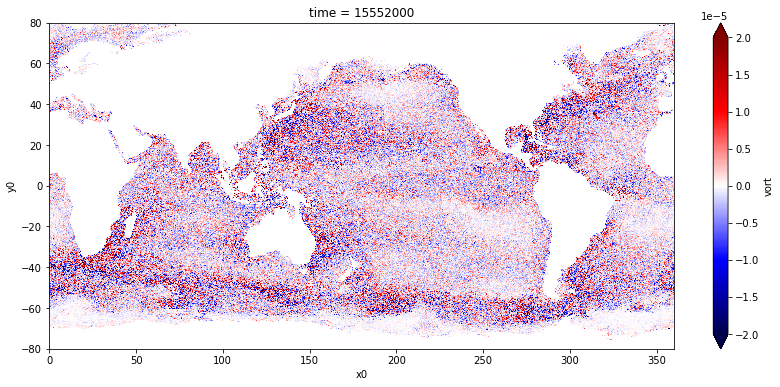

In [16]:
fig = plt.figure(figsize=(14, 6))
ds.vort[-1].plot(cmap='seismic', vmin=-2e-5, vmax=2e-5)

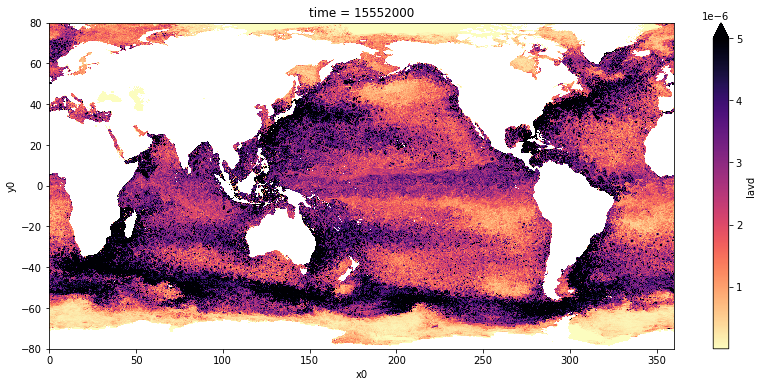

In [19]:
fig = plt.figure(figsize=(14, 6))
ds.lavd[-1].plot(cmap='magma_r', vmax=5e-6)

In [33]:
lon = ds.sel(x0=slice(150,180),y0=slice(20,30)).x
lat = ds.sel(x0=slice(150,180),y0=slice(20,30)).y

Text(0.5, 1.0, 'Day 180')

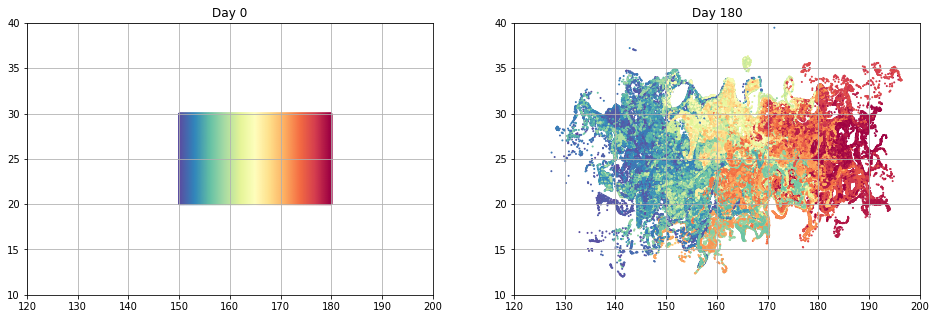

In [35]:
fig = plt.figure(figsize=(16, 5))

plt.subplot(121)
plt.scatter(lon[0], lat[0], c=lon[0], s=1, cmap='Spectral_r')
plt.xlim(120, 200)
plt.ylim(10, 40)
plt.grid()
plt.title('Day 0')

plt.subplot(122)
plt.scatter(lon[-1], lat[-1], c=lon[0], s=1, cmap='Spectral_r')
plt.xlim(120, 200)
plt.ylim(10, 40)
plt.grid()
plt.title('Day 180')


In [20]:
y0 = ds.y[0]
dx = (ds.x[-1] - ds.x[0]).values
dx[np.where(dx>200)] = dx[np.where(dx>200)]-360
dx[np.where(dx<-200)] = dx[np.where(dx<-200)]+360

dy = ds.y[-1] - ds.y[0]

In [21]:
import cmocean
import cartopy.crs as ccrs
import cartopy.feature as cft
import matplotlib.ticker as mticker
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

land_50m = cft.NaturalEarthFeature('physical', 'land', '110m', edgecolor='black', facecolor='lightgrey', linewidth=0.5)

/data/home/liutongya/.conda/envs/geo_scipy/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/data/home/liutongya/.conda/envs/geo_scipy/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)
/data/home/liutongya/.conda/envs/geo_scipy

Text(0.22, 0.355, '(c)')

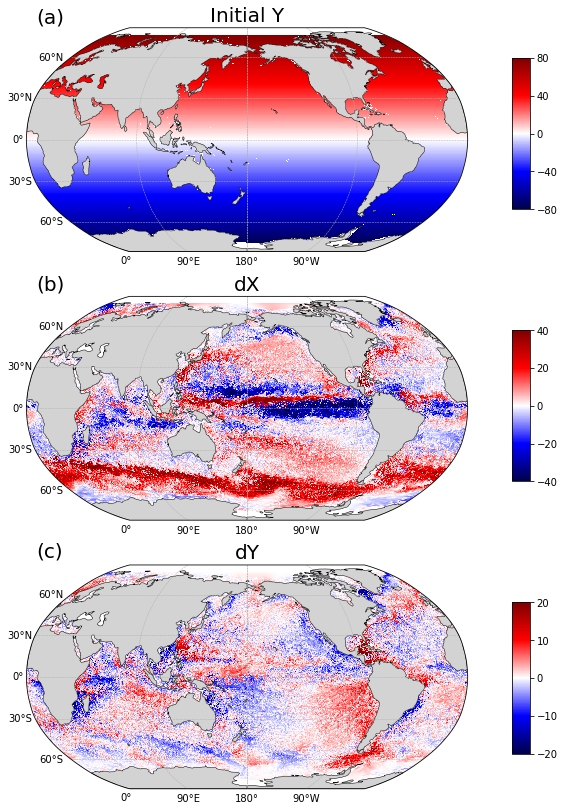

In [22]:
fig = plt.figure(figsize=(10, 14))

ax1 = fig.add_subplot(3, 1, 1, projection=ccrs.Robinson(central_longitude=180))

ax1.add_feature(land_50m)

h1 = plt.pcolormesh(ds.x0[::4], ds.y0[::4], y0[::4, ::4], transform=ccrs.PlateCarree(), cmap='seismic', vmin=-80, vmax=80)

#plt.colorbar(shrink=0.6)
plt.title('Initial Y', size=20)

ax1.set_global()
gl = ax1.gridlines(linewidth=0.5, linestyle='--', draw_labels=True, xlocs=np.arange(-180, 181, 90), ylocs=np.arange(-90, 91, 30))
gl.rotate_labels = False
gl.top_labels = False

ax2 = fig.add_subplot(3, 1, 2, projection=ccrs.Robinson(central_longitude=180))

ax2.add_feature(land_50m)

h2 = plt.pcolormesh(ds.x0[::4], ds.y0[::4], dx[::4, ::4], transform=ccrs.PlateCarree(), cmap='seismic', vmin=-40, vmax=40)
#plt.colorbar(shrink=0.6)
plt.title('dX', size=20)

ax2.set_global()
gl = ax2.gridlines(linewidth=0.5, linestyle='--', draw_labels=True, xlocs=np.arange(-180, 181, 90), ylocs=np.arange(-90, 91, 30))
gl.rotate_labels = False
gl.top_labels = False

ax3 = fig.add_subplot(3, 1, 3, projection=ccrs.Robinson(central_longitude=180))

ax3.add_feature(land_50m)

h3 = plt.pcolormesh(ds.x0[::4], ds.y0[::4], dy[::4, ::4], transform=ccrs.PlateCarree(), cmap='seismic', vmin=-20, vmax=20)

plt.title('dY', size=20)
ax3.set_global()
gl = ax3.gridlines(linewidth=0.5, linestyle='--', draw_labels=True, xlocs=np.arange(-180, 181, 90), ylocs=np.arange(-90, 91, 30))
gl.rotate_labels = False
gl.top_labels = False


cbar_ax = fig.add_axes([0.88, 0.7, 0.025, 0.15])
hc = fig.colorbar(h1, cax=cbar_ax, ticks=np.arange(-80, 81, 40))

cbar_ax = fig.add_axes([0.88, 0.43, 0.025, 0.15])
hc = fig.colorbar(h2, cax=cbar_ax)

cbar_ax = fig.add_axes([0.88, 0.16, 0.025, 0.15])
hc = fig.colorbar(h3, cax=cbar_ax)

fig.text(0.22, 0.885, '(a)', size=20)
fig.text(0.22, 0.62, '(b)', size=20)
fig.text(0.22, 0.355, '(c)', size=20)

#plt.savefig('./pics/fig_dx_dy.png', dpi=300, bbox_inches='tight', facecolor='w')